# Fluxonium

In [5]:
import scqubits as scq
import sys, os
os.chdir("../source")
import SQcircuit as sq
import numpy as np
import scqubits as scq
import matplotlib.pyplot as plt

In [12]:
loop1 = sq.Loop(A = 1e-6)

C = sq.Capacitor(1, 'GHz',Q=1e6 ,error=10)
L = sq.Inductor(0.1,'GHz',Q=500e6 ,loops=[loop1])
JJ = sq.Junction(10,'GHz',cap =C , A_c =1e-7, x_qp=3e-06, loops=[loop1])

circuitElements = {
    (0, 1): [L, JJ]
}

cr1 = sq.Circuit(circuitElements)

decay = []

cr1.setTruncationNumbers([300])

phiExt = np.linspace(-0.9, 0.9, 100)

decay = {'capacitive':np.zeros_like(phiExt),
         'inductive':np.zeros_like(phiExt),
         'cc_noise':np.zeros_like(phiExt),
         'quasiparticle':np.zeros_like(phiExt),
        'flux_noise':np.zeros_like(phiExt)}

for i, phi in enumerate(phiExt):
    loop1.setFlux(phi*2*np.pi)
    eigenValues, _ = cr1.run(numEig=5)
    for decType in decay:
        decay[decType][i]=cr1.decayRate(decType=decType, states=(1,0))

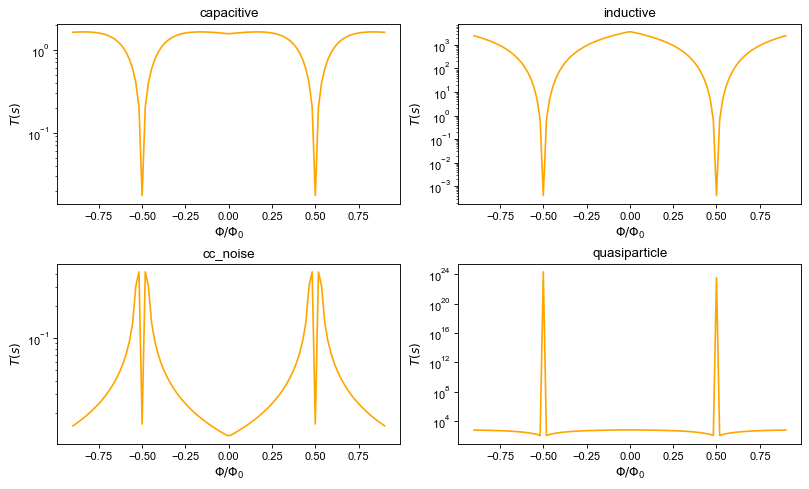

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(10, 6), constrained_layout=True,dpi =80)
for decType, ax in zip(decay, axs.flat):
    ax.semilogy(phiExt, 1/decay[decType],'orange')
    ax.set_title(decType)
    ax.set_xlabel(r"$\Phi/\Phi_0$")
    ax.set_ylabel(r"$T(s)$")

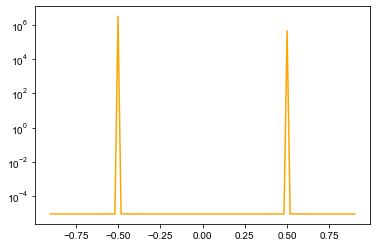

In [14]:
plt.semilogy(phiExt, 1/decay['flux_noise'],'orange')

In [15]:
scq.settings.T1_DEFAULT_WARNING=False

decay = {'capacitive':np.zeros_like(phiExt),
         'inductive':np.zeros_like(phiExt),
         'cc_noise':np.zeros_like(phiExt),
         'quasiparticle':np.zeros_like(phiExt),
        'flux_noise':np.zeros_like(phiExt)}
for i, phi in enumerate(phiExt):
    EJ = 10
    flxnm = scq.Fluxonium(EJ=EJ, EC=1, EL=0.1, flux=phi, cutoff=120)
    decay['inductive'][i] = flxnm.t1_inductive(i=1, j=0, Q_ind=500e6, get_rate=True)/1e-9
    decay['capacitive'][i] = flxnm.t1_capacitive(i=1, j=0, Q_cap=1e6, get_rate=True)/1e-9
    decay['cc_noise'][i] = flxnm.tphi_1_over_f_cc(A_noise=1e-7*EJ, i=1, j=0, get_rate=True)/1e-9
    decay['quasiparticle'][i] = flxnm.t1_quasiparticle_tunneling(i=1, j=0, x_qp=3e-06, get_rate=True)/1e-9
    decay['flux_noise'][i] = flxnm.tphi_1_over_f_flux(A_noise=1e-06, i=1, j=0, get_rate=True)/1e-9
# flxnm.plot_evals_vs_paramvals('flux', phiExt, evals_count=5)

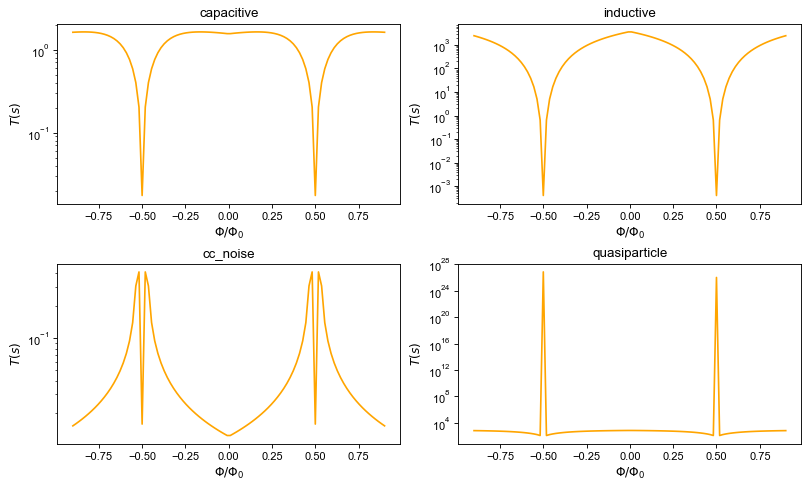

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(10, 6), constrained_layout=True,dpi =80)
for decType, ax in zip(decay, axs.flat):
    ax.semilogy(phiExt, 1/decay[decType],'orange')
    ax.set_title(decType)
    ax.set_xlabel(r"$\Phi/\Phi_0$")
    ax.set_ylabel(r"$T(s)$")

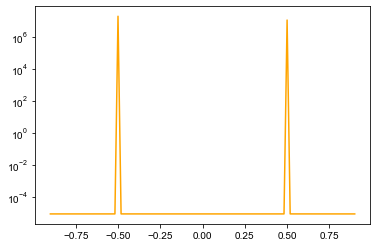

In [17]:
plt.semilogy(phiExt, 1/decay['flux_noise'],'orange')

In [8]:
flxnm = scq.Fluxonium(EJ=10, EC=1, EL=0.1, flux=0.0, cutoff=120)
flxnm.t1_inductive(i=1, j=0, Q_ind=500e6, T=0.015, total=True, esys=None, get_rate=False)*1e-9

1840.148867711499

In [53]:
numEig = 5
phiExt = np.linspace(-1, 1.0, 50) * 2 * np.pi
eigenValues = np.zeros((numEig, len(phiExt)))
sq.unit.setFreq('GHz')
for i in range(len(phiExt)):
    loop1.setFlux(phiExt[i])
    eigenValues[:, i], _ = cr1.run(numEig)

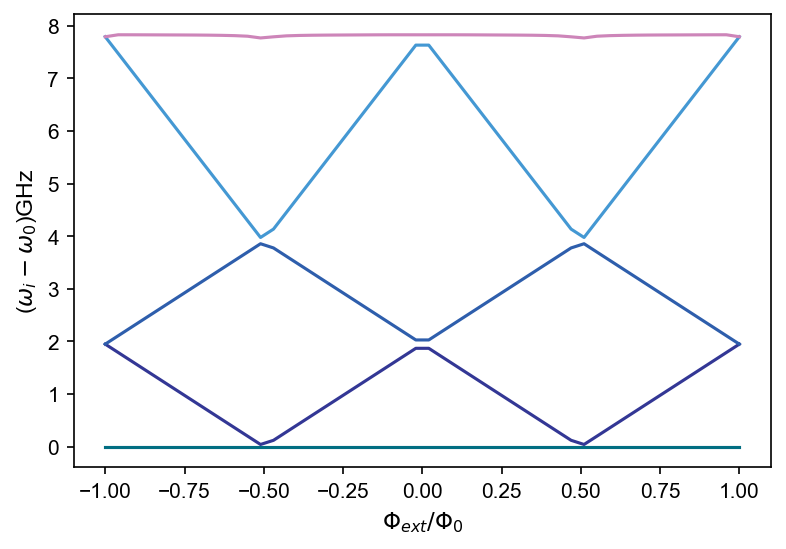

In [116]:
plt.figure()
for i in range(numEig):
    plt.plot(phiExt / 2 / np.pi, (eigenValues[i, :] - eigenValues[0, :]))

plt.xlabel(r"$\Phi_{ext}/\Phi_0$")
plt.ylabel(r"($f_i-f_0$)GHz")
plt.show()

# Fluxonium 1

In [6]:
loop1 = sq.Loop()

C = sq.Capacitor(4, 'GHz', error=10)
L = sq.Inductor(3,'GHz', loops=[loop1])
JJ = sq.Junction(100,'GHz', loops=[loop1])

circuitElements = {
    (0, 1): [C, L, JJ]
}

cr1 = sq.Circuit(circuitElements)

cr1.setTruncationNumbers([80])

## Eigenfrequencies

In [3]:
numEig = 5
phiExt = np.linspace(0.0, 1.0, 50) * 2 * np.pi
eigenValues = np.zeros((numEig, len(phiExt)))
sq.unit.setFreq('GHz')
for i in range(len(phiExt)):
    loop1.setFlux(phiExt[i])
    eigenValues[:, i], _ = cr1.run(numEig)

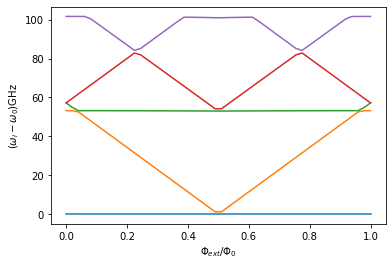

In [4]:
plt.figure()
for i in range(numEig):
    plt.plot(phiExt / 2 / np.pi, (eigenValues[i, :] - eigenValues[0, :]))

plt.xlabel(r"$\Phi_{ext}/\Phi_0$")
plt.ylabel(r"($\omega_i-\omega_0$)GHz")
plt.show()

## Robustness Analysis

In [5]:
sq.unit.setFreq('MHz')

In [6]:
cr1 = sq.Circuit(circuitElements)
cr1.setTruncationNumbers([80])
loop1.setFlux(np.pi)
freqs, _ = cr1.run(numEig)
omega_q_d = freqs[1] - freqs[0]
print("Design frequency is: {}MHz".format(omega_q_d))

Design frequency is: 0.5605275626730872MHz


In [7]:
numTrial = 100
omega_q = []

for i in range(numTrial):
    cr1 = sq.Circuit(circuitElements, random=True)
    cr1.setTruncationNumbers([80])
    loop1.setFlux(np.pi)
    freqs, _ = cr1.run(numEig)
    omega_q.append((freqs[1] - freqs[0]))

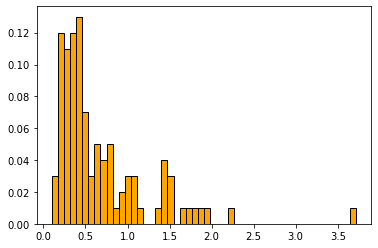

In [8]:
weights = np.ones_like(omega_q) / len(omega_q)
_ ,_ ,_ = plt.hist(omega_q, 50, weights=weights, color="orange", edgecolor='black')
# plt.xlim([0.01,3])

# Fluxonium 2

In [10]:
C = sq.Capacitor(3.6, 'GHz', Q=3e6, error=10)
L = sq.Inductor(0.46,'GHz', loops=[loop1])
JJ = sq.Junction(10.2,'GHz', x_qp = 0.17e-6, loops=[loop1])

circuitElements = {
    (0, 1): [C, L, JJ]
}

cr1 = sq.Circuit(circuitElements)

cr1.setTruncationNumbers([80])

## decay process

In [11]:
cr1.setTemperature(1e-3)

numEig = 2
phiExt = np.linspace(0.0, 0.5, 50) * 2 * np.pi
decays1 = np.zeros(len(phiExt))
decays2 = np.zeros(len(phiExt))
for i in range(len(phiExt)):
    loop1.setFlux(phiExt[i])
    cr1.run(numEig)
    decays1[i] =cr1.decayRate('capacitive',states=(0,1))
    decays2[i] =cr1.decayRate('quasiparticle',states=(0,1))

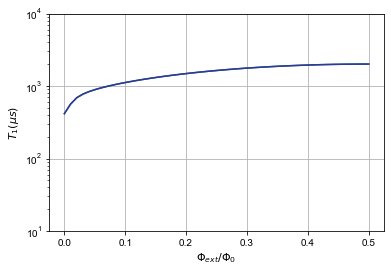

In [12]:
plt.figure()
for i in range(numEig):
    plt.semilogy(phiExt / 2 / np.pi, 1/decays1/1e-6)

plt.xlabel(r"$\Phi_{ext}/\Phi_0$")
plt.ylabel(r"$T_1(\mu s)$")
plt.ylim([1e1,1e4])
plt.grid()
plt.show()

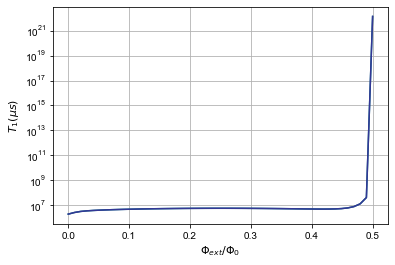

In [14]:
plt.figure()
for i in range(numEig):
    plt.semilogy(phiExt / 2 / np.pi, 1/decays2/1e-6)

plt.xlabel(r"$\Phi_{ext}/\Phi_0$")
plt.ylabel(r"$T_1(\mu s)$")
plt.ylim([1e1,1e4])
plt.grid()
plt.show()